In [1]:
!python --version

Python 3.10.12


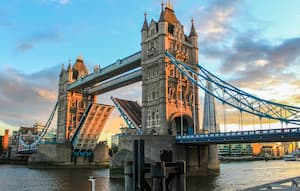

As the climate changes, predicting the weather becomes ever more important for businesses. The aim of of this machine learning project is building a pipeline to predict the climate in London, England. Specifically, the model will predict mean temperature in degrees Celsius (°C).

Since the weather depends on a lot of different factors, different experiments will be run to determine what the best approach is to predict the weather. In this project, experiments will be run for different regression models predicting the mean temperature, using a combination of `sklearn` and `mlflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - **target** mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Run this cell to install mlflow
!pip install -q mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.4 MB/s eta 0:00:00


In [4]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
mlflow.__version__

'2.13.0'

In [6]:
#load data
data = pd.read_csv('/content/drive/MyDrive/london_weather.csv')
df = data.copy()

In [7]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [8]:
#Determine the column names, data types, number of non-null vales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Data Cleaning

In [9]:
df['date'] = pd.to_datetime(df['date'], format="%Y%m%d")

In [10]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

## EDA

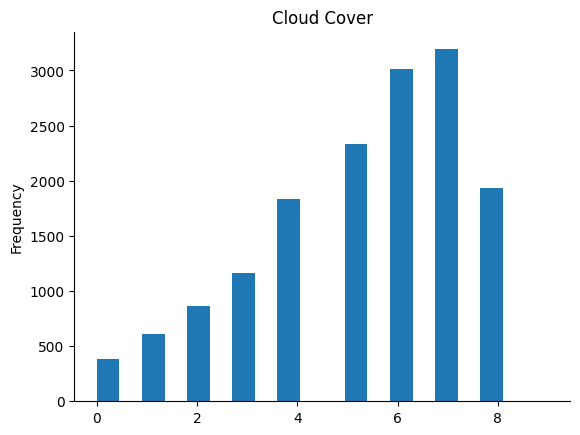

In [11]:
# @title Distribution of Cloud Cover
df['cloud_cover'].plot(kind='hist', bins=20, title='Cloud Cover')
plt.gca().spines[['top', 'right',]].set_visible(False)

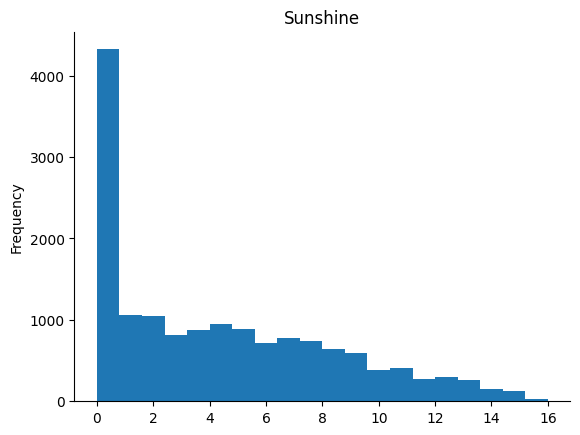

In [12]:
# @title Distribution of Sunshine

df['sunshine'].plot(kind='hist', bins=20, title='Sunshine')
plt.gca().spines[['top', 'right',]].set_visible(False)

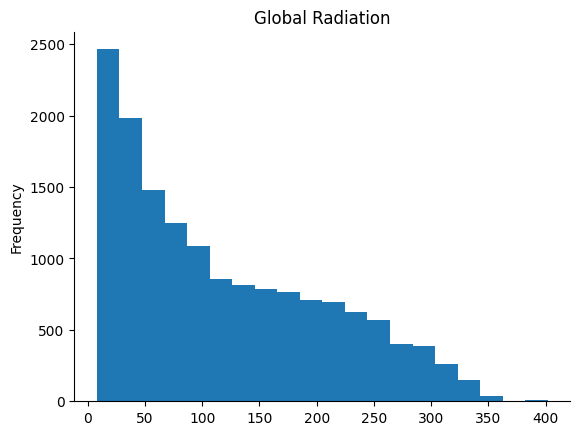

In [13]:
# @title Distribution of Global Radiation

df['global_radiation'].plot(kind='hist', bins=20, title='Global Radiation')
plt.gca().spines[['top', 'right',]].set_visible(False)

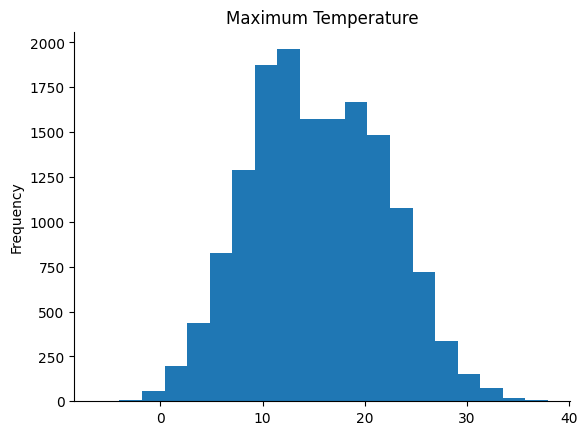

In [14]:
# @title Distribution of Maximum Temperature

df['max_temp'].plot(kind='hist', bins=20, title='Maximum Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

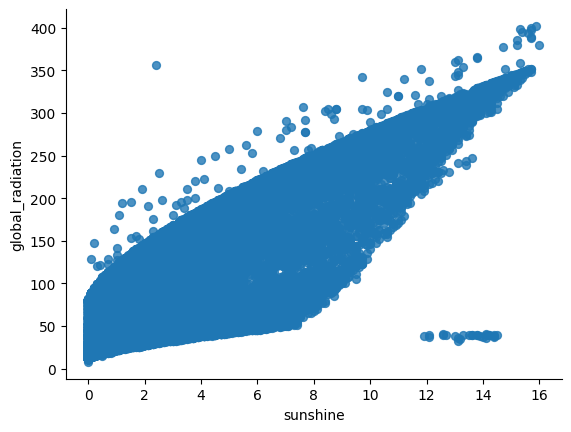

In [15]:
#  @title Scatterplot of Global Radiation vs Sunshine
df.plot(kind='scatter', x='sunshine', y='global_radiation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

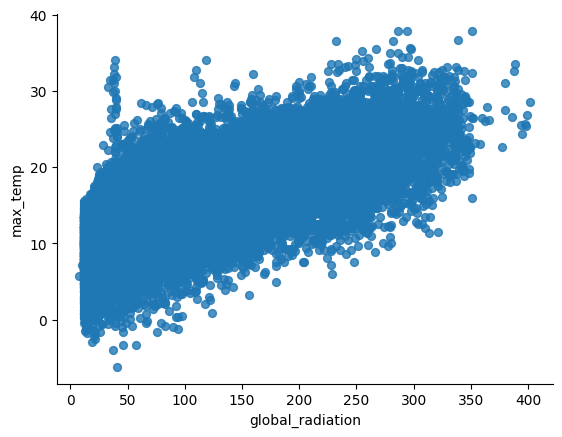

In [16]:
# @title Scatterplot of Maximum Temperature vs Global Radiation
df.plot(kind='scatter', x='global_radiation', y='max_temp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

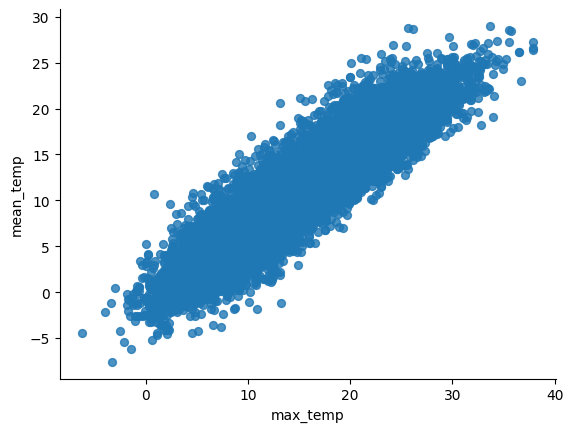

In [17]:
# @title Scatterplot of Mean Temperature vs Maximum Temperature
df.plot(kind='scatter', x='max_temp', y='mean_temp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

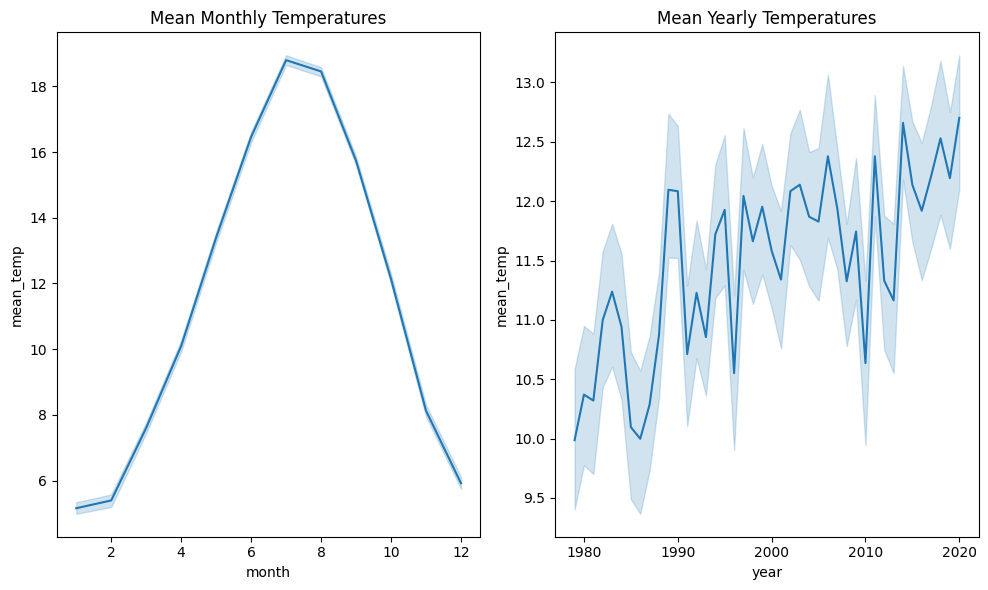

In [18]:
#visualize "mean_temp" versus "year" and "month"
fig, axs = plt.subplots(1,2, figsize=(10,6))
sns.lineplot(data=df, x='month', y='mean_temp', ax=axs[0])
axs[0].set_title('Mean Monthly Temperatures')

sns.lineplot(data=df, x='year', y='mean_temp', ax=axs[1])
axs[1].set_title('Mean Yearly Temperatures')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation of all Features')

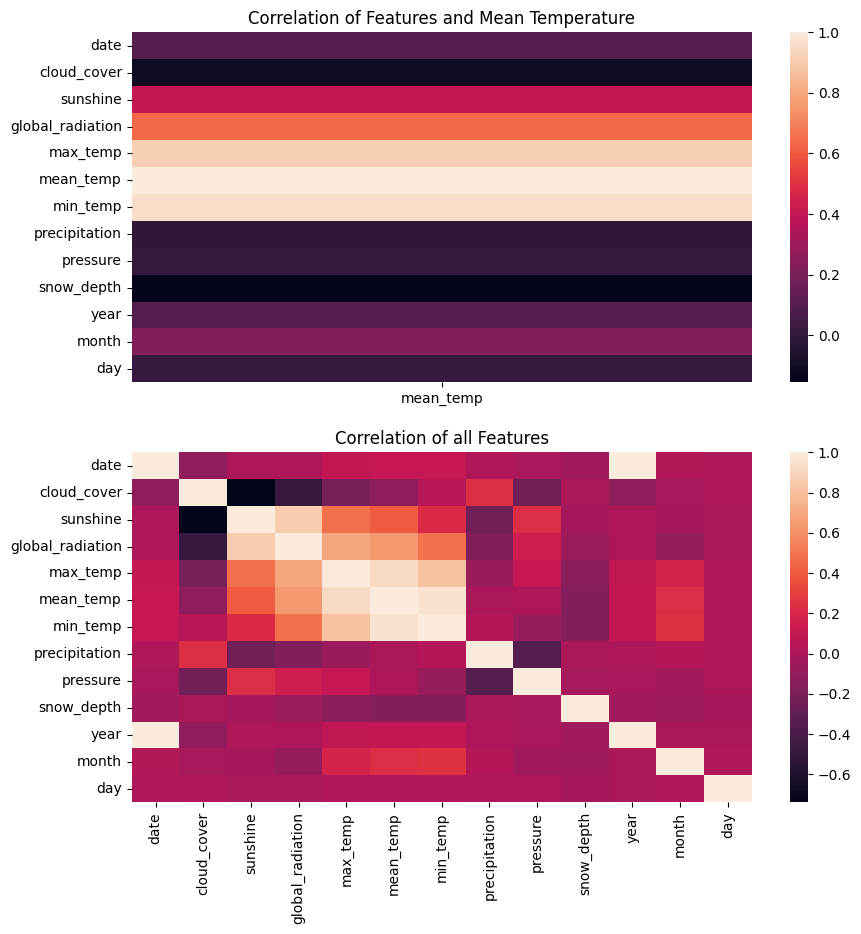

In [19]:
#view correlation between features
corr_matrix = df.corr()
fig, axes = plt.subplots(2,1, figsize=(10,10))

sns.heatmap(corr_matrix[['mean_temp']], ax=axes[0])
axes[0].set_title('Correlation of Features and Mean Temperature')

sns.heatmap(corr_matrix, ax=axes[1])
axes[1].set_title('Correlation of all Features')

### Feature Selection
- Select features that are strongly correlated with mean temperature

In [20]:
rel_features = corr_matrix[corr_matrix['mean_temp'] > 0.5].columns

#select relevant features
selected_df = df[rel_features]

In [21]:
#drop rows with missing values in the target variable
selected_df.dropna(subset=['mean_temp'], inplace=True)

## Data Preprocessing

- Splitting data into train and test sets
- Handling missing values
- Data Normalisation

In [22]:
#split data
X = selected_df
y = X.pop('mean_temp')
X_train, X_test, y_train, y_test =  train_test_split(X ,y, test_size=0.3, random_state=42)

In [23]:
#pipeline for data preprocessing
preprocess_df = make_pipeline(SimpleImputer(), StandardScaler())

In [24]:
#preprocess training and test set
newX_train = preprocess_df.fit_transform(X_train.drop(columns=['date','year','day']))
newX_test = preprocess_df.transform(X_test.drop(columns=['date','year', 'day']))

### Model Tracking and Training

### Model Logging and evaluating with MLflow

In [25]:
mlflow.set_experiment('London Temperature')

2024/05/20 22:43:49 INFO mlflow.tracking.fluent: Experiment with name 'London Temperature' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/511219375421450069', creation_time=1716245029672, experiment_id='511219375421450069', last_update_time=1716245029672, lifecycle_stage='active', name='London Temperature', tags={}>

In [26]:
for idx, depth in enumerate([1,5,10,20]):
    run_name = f"run_{idx}"

    with mlflow.start_run():
        #Train models
        lr = LinearRegression()
        lr.fit(newX_train,y_train)

        dt = DecisionTreeRegressor(max_depth=depth)
        dt.fit(newX_train, y_train)


        rf = RandomForestRegressor(max_depth=depth)
        rf.fit(newX_train, y_train)


        #calculate RMSE
        mlflow.log_metric("lr_rmse", mean_squared_error(y_test, lr.predict(newX_test),squared=False))
        mlflow.log_metric("dt_rmse", mean_squared_error(y_test, dt.predict(newX_test), squared=False))
        mlflow.log_metric("rf_rmse", mean_squared_error(y_test, rf.predict(newX_test), squared=False))

        # Log the trained model as an artifact
        mlflow.sklearn.log_model(lr, "lr_model", registered_model_name="lrtemp")
        mlflow.sklearn.log_model(dt, "dt_model", registered_model_name="dttemp")
        mlflow.sklearn.log_model(rf, "rf_model", registered_model_name="rftemp")



/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'lrtemp'.
Created version '1' of model 'lrtemp'.
Successfully registered model 'dttemp'.
Created version '1' of model 'dttemp'.
Successfully registered model 'rftemp'.
Created version '1' of model 'rftemp'.
Registered model 'lrtemp' already exists. Creating a new version of this model...
Created version '2' of model 'lrtemp'.
Registered model 'dttemp' already exists. Creating a new version of this model...
Created version '2' of model 'dttemp'.
Registered model 'rftemp' already exists. Creating a new version of this model...
Created version '2' of model 'rftemp'.
Registered model 'lrtemp' already exists. Creating a new version of this model...
Created version '3' of model 'lrtemp'.
Registered model 'dttemp' already exists. Creating a new version of this model...
Created version '3' of 

### Searching logged results

In [27]:
experiment_results = mlflow.search_runs()
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rf_rmse,metrics.dt_rmse,metrics.lr_rmse,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.runName
0,efad01c3348c46d48c20c65e7c26ce59,511219375421450069,FINISHED,file:///content/mlruns/511219375421450069/efad...,2024-05-20 22:44:36.859000+00:00,2024-05-20 22:44:50.669000+00:00,0.866078,1.231774,0.873712,root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""efad01c3348c46d48c20c65e7c26ce59""...",learned-fly-467
1,d09d8dc12b504d32a403d7923299fc09,511219375421450069,FINISHED,file:///content/mlruns/511219375421450069/d09d...,2024-05-20 22:44:26.586000+00:00,2024-05-20 22:44:36.853000+00:00,0.858898,1.039822,0.873712,root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""d09d8dc12b504d32a403d7923299fc09""...",redolent-hound-977
2,be85ceaa02f14cbbb3dccea4952086e8,511219375421450069,FINISHED,file:///content/mlruns/511219375421450069/be85...,2024-05-20 22:44:13.907000+00:00,2024-05-20 22:44:26.578000+00:00,1.078758,1.253021,0.873712,root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""be85ceaa02f14cbbb3dccea4952086e8""...",fortunate-loon-962
3,9910608257e84e80ade271923ebf2eb0,511219375421450069,FINISHED,file:///content/mlruns/511219375421450069/9910...,2024-05-20 22:43:49.856000+00:00,2024-05-20 22:44:13.902000+00:00,3.345273,3.410216,0.873712,root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...,"[{""run_id"": ""9910608257e84e80ade271923ebf2eb0""...",serious-tern-715


## Model Evaluation
- The Random Regressor gives the best result with RMSE of 0.861

In [28]:
# Sort the DataFrame by the metrics columns in ascending order
df_sorted_dt_rmse = experiment_results.sort_values(by='metrics.dt_rmse')
df_sorted_rf_rmse = experiment_results.sort_values(by='metrics.rf_rmse')
df_sorted_lr_rmse = experiment_results.sort_values(by='metrics.lr_rmse')

# Get the best model for each metric
best_model_dt_rmse = df_sorted_dt_rmse.iloc[0]
best_model_rf_rmse = df_sorted_rf_rmse.iloc[0]
best_model_lr_rmse = df_sorted_lr_rmse.iloc[0]

In [29]:
print("Best model based on Decision regressor model:")
print(best_model_dt_rmse['metrics.dt_rmse'])

print("\nBest model based on Random Forest regressor model:")
print(best_model_rf_rmse['metrics.rf_rmse'])

print("\nBest model based on Linear regression model:")
print(best_model_lr_rmse['metrics.lr_rmse'])

Best model based on Decision regressor model:
1.039821966125239

Best model based on Random Forest regressor model:
0.858898486998028

Best model based on Linear regression model:
0.8737119397781734


In [30]:
#View the random regressor model
client = mlflow.MlflowClient()
dt_filter_string = "name = 'rftemp'"

# Search for Random Forest Regressor Models
print(client.search_registered_models(filter_string=dt_filter_string))

[<RegisteredModel: aliases={}, creation_timestamp=1716245053891, description=None, last_updated_timestamp=1716245090608, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1716245090608, current_stage='None', description=None, last_updated_timestamp=1716245090608, name='rftemp', run_id='efad01c3348c46d48c20c65e7c26ce59', run_link=None, source='file:///content/mlruns/511219375421450069/efad01c3348c46d48c20c65e7c26ce59/artifacts/rf_model', status='READY', status_message=None, tags={}, user_id=None, version=4>], name='rftemp', tags={}>]


### Load Best Model

In [31]:
#best model run id
best_model_run_id = best_model_rf_rmse['run_id']

In [32]:
#best model uri
best_model_arti_uri = best_model_rf_rmse['artifact_uri']

In [33]:
#full uri path
best_model_uri  = f'{best_model_arti_uri}/rf_model'

In [34]:
model = mlflow.sklearn.load_model(best_model_uri)
#model = mlflow.pyfunc.load_model(f"runs:/{best_model_run_id}/rf_model")

#### Best model version

In [35]:
#Get best model version
model_name = "rftemp"

version = client.search_model_versions(f"name='{model_name}'")
[model for model in version if model.run_id == best_model_run_id]

[<ModelVersion: aliases=[], creation_timestamp=1716245076841, current_stage='None', description=None, last_updated_timestamp=1716245076841, name='rftemp', run_id='d09d8dc12b504d32a403d7923299fc09', run_link=None, source='file:///content/mlruns/511219375421450069/d09d8dc12b504d32a403d7923299fc09/artifacts/rf_model', status='READY', status_message=None, tags={}, user_id=None, version=3>]

#### Parameters of the best model

In [36]:
#Get parameters ofm the best model
params = model.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
#Dataframe of best Model Parameters
params_df = pd.DataFrame(params.items(), columns=['Parameter', 'Value'])
params_df

,Parameter,Value
0,bootstrap,True
1,ccp_alpha,0.0
2,criterion,squared_error
3,max_depth,10
4,max_features,1.0
5,max_leaf_nodes,None
6,max_samples,None
7,min_impurity_decrease,0.0
8,min_samples_leaf,1
9,min_samples_split,2


## Transition Model to Testing and Production Stages

- Random Regressor Model version 3 moved to Production stage

In [38]:
# Transition version 3 of Insurance model to testing stage
client.transition_model_version_stage(name="rftemp", version=3,
        stage="Staging"
    )

<ipython-input-38-98a19d604a6a>:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.13.0/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(name="rftemp", version=3,


<ModelVersion: aliases=[], creation_timestamp=1716245076841, current_stage='Staging', description=None, last_updated_timestamp=1716245090961, name='rftemp', run_id='d09d8dc12b504d32a403d7923299fc09', run_link=None, source='file:///content/mlruns/511219375421450069/d09d8dc12b504d32a403d7923299fc09/artifacts/rf_model', status='READY', status_message=None, tags={}, user_id=None, version=3>

In [39]:
# Transition Model to Production
client.transition_model_version_stage(name="rftemp", version=3, stage="Production")

<ipython-input-39-03958e6a5294>:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.13.0/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(name="rftemp", version=3, stage="Production")


<ModelVersion: aliases=[], creation_timestamp=1716245076841, current_stage='Production', description=None, last_updated_timestamp=1716245090981, name='rftemp', run_id='d09d8dc12b504d32a403d7923299fc09', run_link=None, source='file:///content/mlruns/511219375421450069/d09d8dc12b504d32a403d7923299fc09/artifacts/rf_model', status='READY', status_message=None, tags={}, user_id=None, version=3>

###Load Producton Model

In [40]:
# Load the Production stage of the Random regressor model
prod_model = mlflow.sklearn.load_model("models:/rftemp/Production")

/usr/local/lib/python3.10/dist-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.13.0/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


## Testing Production Model

- Production Model has accuracy of 97.7%

In [41]:
prod_model.score(newX_test, y_test)

0.9773808665646861